### Load Network and See feature map

In [7]:
# from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from keras.models import Model, load_model
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense

# import metrics

from keras.layers import Input, Dense, GRU, Embedding,Lambda
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers.merge import concatenate as concat

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense, Activation, Dropout
from tensorflow.python.keras.models import load_model
from keras.models import model_from_json

from time import time
import numpy as np
import pandas as pd
import keras.backend as K
from keras.engine.topology import Layer, InputSpec
from keras.optimizers import SGD,Adam
from keras import callbacks
from keras.initializers import VarianceScaling
from sklearn.cluster import KMeans




Using TensorFlow backend.


In [8]:
model = Sequential()
model.add(Convolution2D(24, 5, 5, subsample=(2, 2), input_shape=(200, 300, 3), activation='elu'))
# model.add(Convolution2D(36, 5, 5, subsample=(2, 2), activation='elu'))
# model.add(Convolution2D(48, 5, 5, subsample=(2, 2), activation='elu'))
model.add(Convolution2D(64, 3, 3, activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

'''
model.add(Convolution2D(24, 5, 5, subsample=(2, 2), input_shape=(200, 300, 3), activation='elu'))
model.add(Convolution2D(36, 5, 5, subsample=(2, 2), activation='elu'))
model.add(Convolution2D(48, 5, 5, subsample=(2, 2), activation='elu'))
model.add(Convolution2D(64, 3, 3, activation='elu'))
'''

model.add(Convolution2D(128, 3, 3, activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(128, 3, 3, activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(MaxPooling2D(pool_size=(2, 2)))
#   model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(90, activation = 'elu'))
#   model.add(Dropout(0.5))

model.add(Dense(60, activation = 'elu'))

model.add(Dense(30, activation = 'elu'))
#   model.add(Dropout(0.5))

model.add(Dense(10, activation = 'elu'))
#   model.add(Dropout(0.5))

# model.add(Dense(4))

model.add(Dense(2,activation='softmax'))



filepath='./CNNModel/cnnmodel.h5'
try:
    model.load_weights(filepath)
    print("load weight success")
except:
    print("load weight failed")
    pass

optimizer = Adam(lr=1e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['categorical_accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


/home/home9/.virtualenvs/deeplearning/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(200, 300,..., strides=(2, 2), activation="elu")`
  
/home/home9/.virtualenvs/deeplearning/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  """
/home/home9/.virtualenvs/deeplearning/lib/python3.5/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="elu")`
  from ipykernel import kernelapp as app
/home/home9/.virtualenvs/deeplearning/lib/python3.5/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="elu")`


load weight success


In [ ]:
# try:
#     model = load_model('./CNNModel/cnnmodel.h5')
# except:
#     pass
# model.summary()

In [15]:
%matplotlib inline
import gzip 
count = 0
try:
    np_data = []
    with gzip.open( './data/KS11/test_pic.npy.gz', 'r') as infile:
        while True:
            try:
                np_data.append(np.load(infile))
#                 plt.imshow(np_data_list[-1])
#                 plt.show()
#                 if count > 100:
#                     break
                count += 1
            except:
                break 
    np_data = np.array(np_data)  
except Exception as e:
    print(e)
    

In [16]:
np_data = np_data/255


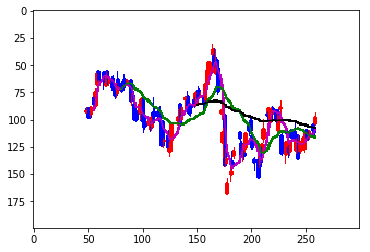

In [17]:
%matplotlib inline

import matplotlib.pyplot as plt 
# plt.imshow(np_data[0])
# tmpnp = np_data[100]
# tmpnp = tmpnp/255
plt.imshow(np_data[0])
# plt.show()
# plt.savefig('./temp.png')

In [18]:
_input = np_data
y_pred = model.predict(_input)
print(y_pred.shape)
cls_pred = np.argmax(y_pred, axis=1)
# cls_pred

(245, 2)


In [23]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder() # one hot encode the target classes

df_test = pd.read_pickle('./data/KS11/df_test.pkl')
               
# print("df_train {}".format(df_train.shape))

df_test['id'] = 0
df_test.loc[(df_test['signal_5ma'] == 9) , ['id']] = 1
df_test.loc[(df_test['signal_5ma'] == 8) , ['id']] = 1
df_test.loc[(df_test['signal_5ma'] == -9) , ['id']] = 0
df_test.loc[(df_test['signal_5ma'] == 0) , ['id']] = 0

_valin = df_test['id'].values


np_target = one_hot.fit_transform(np.reshape(_valin, (-1,1)) ).toarray()
np_target.shape

/home/home9/.virtualenvs/deeplearning/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:414: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(245, 2)

In [24]:
res = (cls_pred == _valin)
correct_num = np.where(res == True)

success_rate = correct_num[0].shape[0]/cls_pred.shape[0]
success_rate



0.5387755102040817

In [47]:
_evalresult = model.evaluate(x=np_data,y=np_target)

784/784 [==============================] - 7s 9ms/step


In [52]:
_evalresult

5.786425656674605

### Visualize weights layers

In [10]:
import math 

def plot_conv_weights(weights, input_channel=0):
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(weights)
    w_max = np.max(weights)

    # Number of filters used in the conv. layer.
    num_filters = weights.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot all the filter-weights.
    for i, ax in enumerate(axes.flat):
        # Only plot the valid filter-weights.
        if i<num_filters:
            # Get the weights for the i'th filter of the input channel.
            # See new_conv_layer() for details on the format
            # of this 4-dim tensor.
            img = weights[:, :, input_channel, i]

            # Plot image.
            ax.imshow(img, vmin=w_min, vmax=w_max,
                      interpolation='nearest', cmap='seismic')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 148, 24)       1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 146, 64)       13888     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 73, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 35, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 33, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 16, 128)       0         
__________

In [44]:
layer_conv1 = model.layers[10]
layer_conv1

In [45]:
weights_conv1 = layer_conv1.get_weights()[0]
weights_conv1.shape

(60, 30)

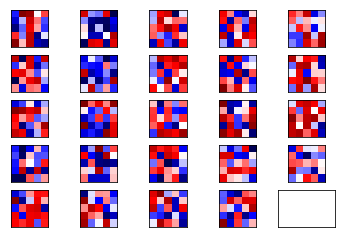

In [34]:
plot_conv_weights(weights=weights_conv1, input_channel=1)

### get layer output

In [14]:
layer_name = 'dense_4'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(np_data)

In [15]:
print(intermediate_output.shape)
intermediate_output[0]

(245, 10)


array([-0.22774929,  0.59358585,  0.5918297 ,  0.6881008 , -0.24005187,
       -0.5853784 , -0.3865024 , -0.09876883,  0.151473  , -0.43833733],
      dtype=float32)

### Keras softmax classification 

In [ ]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from keras.layers import Dense, Input, concatenate, Dropout
from keras.models import Model
from keras.optimizers import rmsprop

dataset = load_wine()

ensemble_num = 10 # number of sub-networks
bootstrap_size = 0.8 # 80% size of original (training) dataset
training_size = 0.8 # 80% for training, 20% for test

num_hidden_neurons = 10 # number of neurons in hidden layer
dropout = 0.25 # percentage of weights dropped out before softmax output (this prevents overfitting)

epochs = 200 # number of epochs (complete training episodes over the training set) to run
batch = 10 # mini batch size for better convergence

# get the holdout training and test set
temp = []
scaler = MinMaxScaler()
one_hot = OneHotEncoder() # one hot encode the target classes
dataset['data'] = scaler.fit_transform(dataset['data'])
dataset['target'] = one_hot.fit_transform(np.reshape(dataset['target'], (-1,1)) ).toarray()
for i in range(len(dataset.data)):
    temp.append([dataset['data'][i], np.array(dataset['target'][i])])

# shuffle the row of data and targets
temp = np.array(temp)
np.random.shuffle(temp)
# holdout training and test stop index
stop = int(training_size*len(dataset.data))

train_X = np.array([x for x in temp[:stop,0]])
train_Y = np.array([x for x in temp[:stop,1]])
test_X = np.array([x for x in temp[stop:,0]])
test_Y = np.array([x for x in temp[stop:,1]])

# now build the ensemble neural network
# first, let's build the individual sub-networks, each
# as a Keras functional model.
sub_net_outputs = []
sub_net_inputs = []
for i in range(ensemble_num):
    # two hidden layers to keep it simple
    # specify input shape to the shape of the training set
    net_input = Input(shape = (train_X.shape[1],))
    sub_net_inputs.append(net_input)
    y = Dense(num_hidden_neurons)(net_input)
    y = Dense(num_hidden_neurons)(y)
    y = Dropout(dropout)(y)
    sub_net_outputs.append(y) # sub_nets contains the output tensors

# now concatenate the output tensors
y = concatenate(sub_net_outputs)

# final softmax output layer
y = Dense(train_Y[0].shape[0], activation='softmax')(y)

# now build the whole funtional model
model = Model(inputs=sub_net_inputs, outputs=y)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

print("Begin training...")

# train the model
model.fit( [train_X] * ensemble_num, train_Y,validation_data=[ [test_X] * ensemble_num, test_Y],
          epochs=epochs, batch_size=batch)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
width, height, channels = trainX.shape[1], trainX.shape[2], 1
trainX = trainX.reshape((trainX.shape[0], width, height, channels))
testX = testX.reshape((testX.shape[0], width, height, channels))
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

datagen = ImageDataGenerator(rescale=1.0/255.0)
# prepare an iterators to scale images
train_iterator = datagen.flow(trainX, trainY, batch_size=64)
print(train_iterator)
test_iterator = datagen.flow(testX, testY, batch_size=64)
print('Batches train=%d, test=%d' % (len(train_iterator), len(test_iterator)))
# confirm the scaling works
batchX, batchy = train_iterator.next()
